# Lets Grow more Data Science Internship Intermediate Level Task-1

# Auther Name-Kshama Gaikwad

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reading Dataset

In [2]:
df=pd.read_csv(r"C:\Users\admin\Desktop\globalterrorism.csv",encoding="latin-1")
df.sample(5)

C:\Users\admin\AppData\Local\Temp\ipykernel_12648\2061752522.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r"C:\Users\admin\Desktop\globalterrorism.csv",encoding="latin-1")


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
115115,201303120011,2013,3,12,NaN,0,NaN,78,Greece,8,...,NaN,"""Greece: Explosions at Three Political Offices...","""Small bomb explodes at Greek courier firm in ...","""Offices of three Greek MPs targeted with make...",START Primary Collection,0,0,0,0,"201303120011, 201303120012, 201303120013"
82237,200701250004,2007,1,25,NaN,0,NaN,95,Iraq,10,...,NaN,"Qassim Abdul-Zahra, ""Suicide car bomber kills ...","Bassme Mroue, ""Al-Maliki vows no letup against...","Assad Abboud, ""32 killed in Baghdad market bom...",CETIS,-9,-9,0,-9,NaN
27672,198603260054,1986,3,26,NaN,0,NaN,43,Chile,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,"198603260054, 198603260001, 198603260002, 1986..."
124236,201312030041,2013,12,3,NaN,0,NaN,95,Iraq,10,...,Casualty numbers for this incident conflict ac...,"""Xinhua: 31 Killed, 73 Wounded In Bomb Attacks...","""6 civilians killed, 11+ wounded in Baya' area...","""Iraq Attacks Kill 23 As Year's Toll Tops 6,20...",START Primary Collection,-9,-9,0,-9,NaN
88923,200809280013,2008,9,28,NaN,0,NaN,4,Afghanistan,6,...,NaN,"BBC, ""Top Afghan Policewoman Shot Dead,"" Afgha...","Lexis Nexis, ""Afghan Woman Police Director Gun...",NaN,ISVG,0,0,0,0,NaN


In [3]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [4]:
# I'm just taking important data from whole dataset, which I will use in further process.
df=df[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [5]:
df.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


# Finding null values

In [6]:
df.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

* there are null values in data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(3),

# Top 5 Countries affected by terror attack

In [8]:
print("Top 5 Countries with most attacks:",df['Country'].value_counts())

Top 5 Countries with most attacks: Iraq                   24636
Pakistan               14368
Afghanistan            12731
India                  11960
Colombia                8306
                       ...  
International              1
Wallis and Futuna          1
South Vietnam              1
Andorra                    1
Antigua and Barbuda        1
Name: Country, Length: 205, dtype: int64


<AxesSubplot:ylabel='Country'>

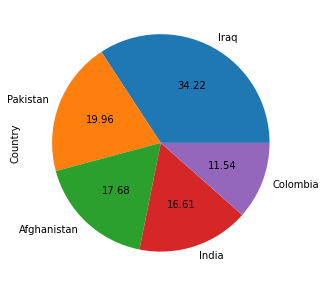

In [9]:
plt.figure(figsize=(10,5))
df['Country'].value_counts().head(5).plot(kind='pie',autopct='%.2f')

* Most of the times Iraq has been attacked by terrorists

# Top 5 Cities with most attack

In [10]:
print("Top 5 Cities with most attacks:",df['city'].value_counts().head(5))

Top 5 Cities with most attacks: Unknown    9775
Baghdad    7589
Karachi    2652
Lima       2359
Mosul      2265
Name: city, dtype: int64


<AxesSubplot:>

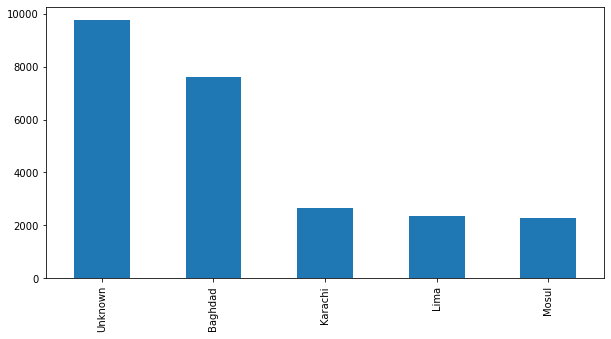

In [11]:
plt.figure(figsize=(10,5))
df['city'].value_counts().head(5).plot(kind='bar')

* As here 1st city is unknown, so, city with most attacks is Baghdad

# State With the Most attacks

In [12]:
df['state'].value_counts()

Baghdad                  7645
Northern Ireland         4498
Unknown                  4290
Balochistan              3710
Saladin                  3411
                         ... 
Federal Territory           1
Topaz (Province)            1
Obilic (Municipality)       1
East Timor (Region)         1
Vidzeme                     1
Name: state, Length: 2855, dtype: int64

<AxesSubplot:ylabel='state'>

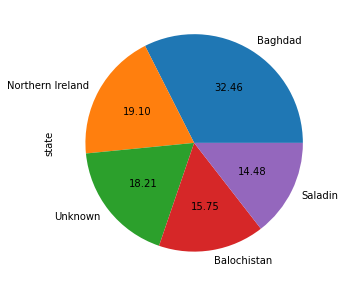

In [13]:
plt.figure(figsize=(10,5))
df['state'].value_counts().head(5).plot(kind='pie',autopct='%.2f')

* Baghdad State has been Mostly Attacked by Terrorists.

# Top 5 Regions with most attack

In [14]:
print("Top 5 Regions with most attacks:",df['Region'].value_counts().head(5))

Top 5 Regions with most attacks: Middle East & North Africa    50474
South Asia                    44974
South America                 18978
Sub-Saharan Africa            17550
Western Europe                16639
Name: Region, dtype: int64


<AxesSubplot:ylabel='Region'>

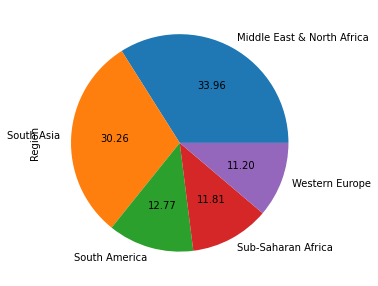

In [15]:
plt.figure(figsize=(10,5))
df['Region'].value_counts().head(5).plot(kind='pie',autopct='%.2f')

* Region with most attacks is Middle East & North Africa

# Top Year with most attacks

In [16]:
print("Year with most attacks:",df['Year'].value_counts())

Year with most attacks: 2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: Year, dtype: int64


<AxesSubplot:>

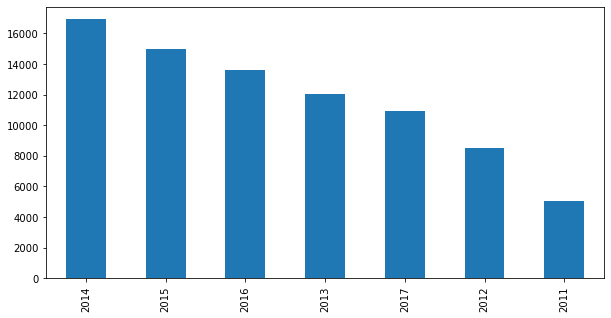

In [17]:
plt.figure(figsize=(10,5))
df['Year'].value_counts().head(7).plot(kind='bar')

* 2014 is the year in which most of the terror attcks happened.

# Month with most attack

In [18]:
print("Month with most attacks:",df['Month'].value_counts())

Month with most attacks: 5     16875
7     16268
8     15800
10    15563
6     15359
3     15257
4     15152
1     14936
11    14906
9     14180
2     13879
12    13496
0        20
Name: Month, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Month', ylabel='count'>

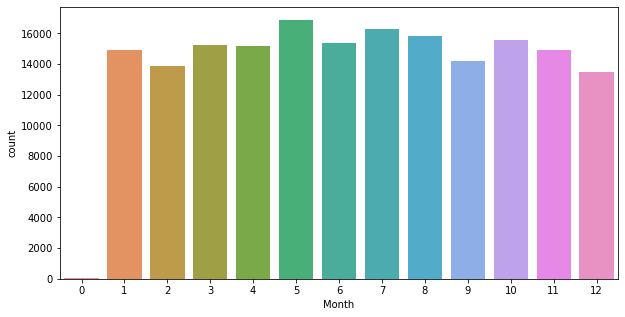

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(df['Month'])

* In Month of 5  or May Most of the terror attack has been done.

# Groups which attacks most

In [20]:
print("Top 5 Groups which attacks most:",df['Group'].value_counts())

Top 5 Groups which attacks most: Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
                                                    ...  
Ansar Sarallah                                          1
Sword of Islam                                          1
Support of Ocalan-The Hawks of Thrace                   1
Arab Revolutionary Front                                1
MANO-D                                                  1
Name: Group, Length: 3537, dtype: int64


<AxesSubplot:>

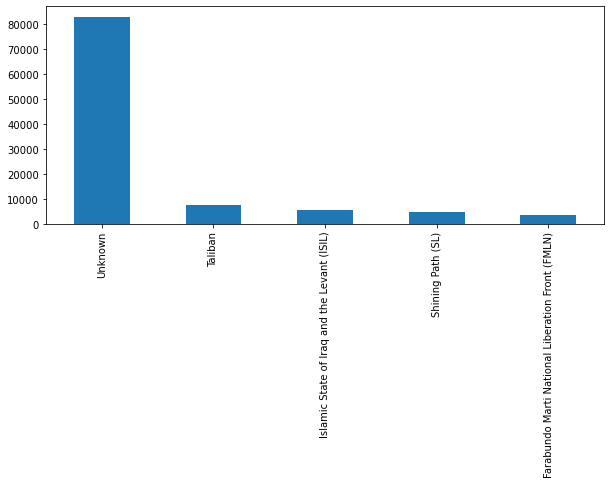

In [21]:
plt.figure(figsize=(10,4))
df['Group'].value_counts().head(5).plot(kind='bar')

* as 1st group is unknown so, Taliban attacks or do more terror.

# Most of terrorism done by using which AttackType

In [22]:
print("Top 5 attack types:",df['AttackType'].value_counts())

Top 5 attack types: Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: AttackType, dtype: int64


<AxesSubplot:ylabel='AttackType'>

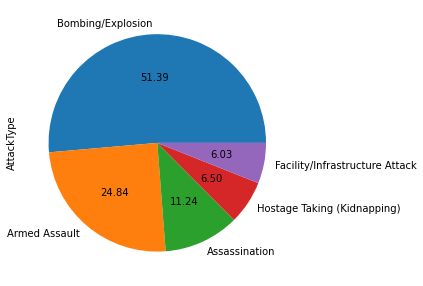

In [23]:
plt.figure(figsize=(10,5))
df['AttackType'].value_counts().head(5).plot(kind='pie',autopct='%.2f')

* Most of the time attack has been done with Bombing/Explosion

# Weapons used for attack

In [24]:
print("Top 5 attack types:",df['Weapon_type'].value_counts())

Top 5 attack types: Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                 

<AxesSubplot:ylabel='Weapon_type'>

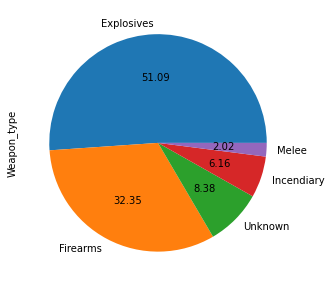

In [25]:
plt.figure(figsize=(10,5))
df['Weapon_type'].value_counts().head(5).plot(kind='pie',autopct='%.2f')

* Explosives are mostly used by terrorist to carryout attacks

In [26]:
df['Wounded'] = df['Wounded'].fillna(0).astype(int)
df['Killed'] = df['Killed'].fillna(0).astype(int)
df['casualities'] = df['Killed'] + df['Wounded']

In [27]:
df1 = df.sort_values(by='casualities',ascending=False)[:40]

In [28]:
df1.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
73126,2001,9,11,United States,New York,North America,New York City,40.697132,-73.931351,Hijacking,1384,8190,Passengers and crew members on American Airlin...,09/11/2001: This was one of four related attac...,Al-Qaida,Private Citizens & Property,Vehicle (not to include vehicle-borne explosiv...,Unknown,9574
73127,2001,9,11,United States,New York,North America,New York City,40.697132,-73.931351,Hijacking,1383,8191,Passengers and crew members on United Airlines...,09/11/2001: This was one of four related attac...,Al-Qaida,Private Citizens & Property,Vehicle (not to include vehicle-borne explosiv...,Unknown,9574
58841,1995,3,20,Japan,Tokyo,East Asia,Tokyo,35.689125,139.747742,Unarmed Assault,13,5500,Subway system,NaN,Aum Shinri Kyo,Transportation,Chemical,NaN,5513
68071,1998,8,7,Kenya,Nairobi,Sub-Saharan Africa,Nairobi,-1.285180,36.821107,Bombing/Explosion,224,4000,"United States Embassy in Nairobi, Kenya",08/07/1998: Suicide attackers detonated a vehi...,Al-Qaida,Government (Diplomatic),Explosives,Unknown,4224
133518,2014,6,12,Iraq,Saladin,Middle East & North Africa,Tikrit,34.621521,43.668377,Hostage Taking (Kidnapping),1570,0,Soldiers,06/12/2014: Assailants abducted approximately ...,Islamic State of Iraq and the Levant (ISIL),Military,Firearms,The Islamic State of Iraq and the Levant (ISIL...,1570


* as we can see in above dataframe most casualities done in US

In [29]:
heat=df1.pivot_table(index='Country',columns='Year',values='casualities')
heat.fillna(0,inplace=True)

In [30]:
heat.head()

Year,1982,1984,1992,1994,1995,1996,1997,1998,2001,2004,2005,2006,2007,2008,2009,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,536.0,0.0,584.0
Chad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1161.0,0.0,0.0,0.0,0.0,0.0
Ethiopia,0.0,0.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
France,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,520.0,0.0
India,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1005.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='Year', ylabel='Country'>

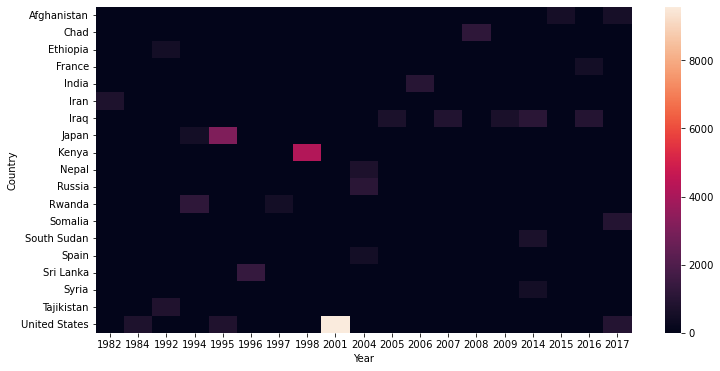

In [39]:
plt.figure(figsize=(12,6))
sns.heatmap(heat)

* Most Casualities happened in US in 2001

In [31]:
#Number of Killed in Terrorist Attacks by Countries
countryData = df.loc[:,'Country']
killData = df.loc[:,'Killed']
# countyData
countryKillData = pd.concat([countryData, killData], axis=1)

In [32]:
countryKillData.head()

,Country,Killed
0,Dominican Republic,1
1,Mexico,0
2,Philippines,1
3,Greece,0
4,Japan,0


In [33]:
countryKill = countryKillData.pivot_table(columns='Country', values='Killed', aggfunc='sum')
countryKill

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
Killed,39384,42,11066,0,3043,0,490,37,23,30,...,1,0,1500,97,1,8776,119,324,70,154


In [34]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size

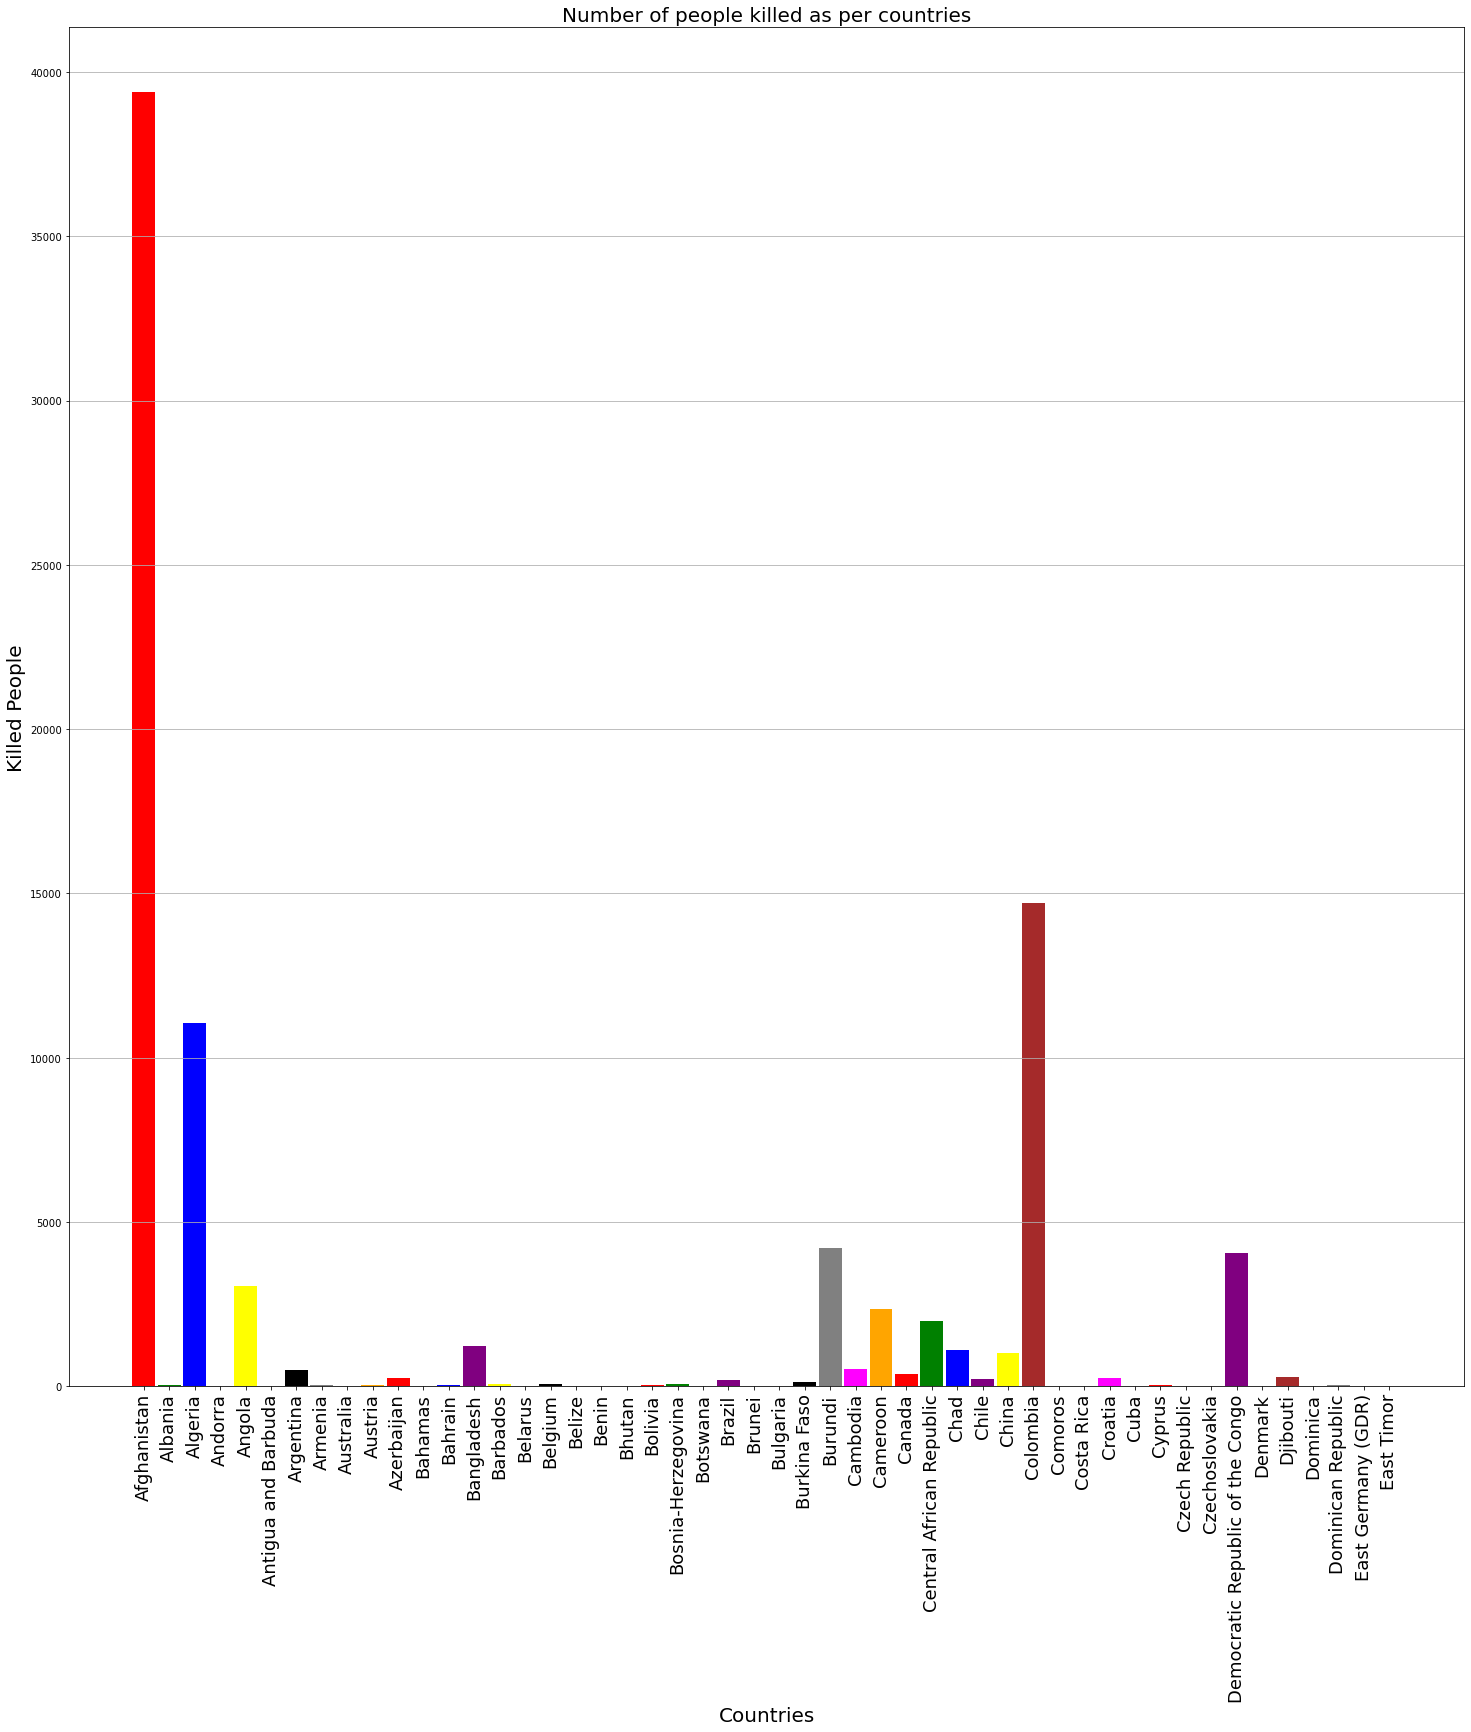

In [35]:
labels = countryKill.columns.tolist()
labels = labels[:50] #50 bar provides nice view
index = np.arange(len(labels))
transpoze = countryKill.T
values = transpoze.values.tolist()
values = values[:50]
values = [int(i[0]) for i in values] # convert float to int
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange'] # color list for bar chart bar color 
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of people killed as per countries', fontsize = 20)
# print(fig_size)
plt.show()

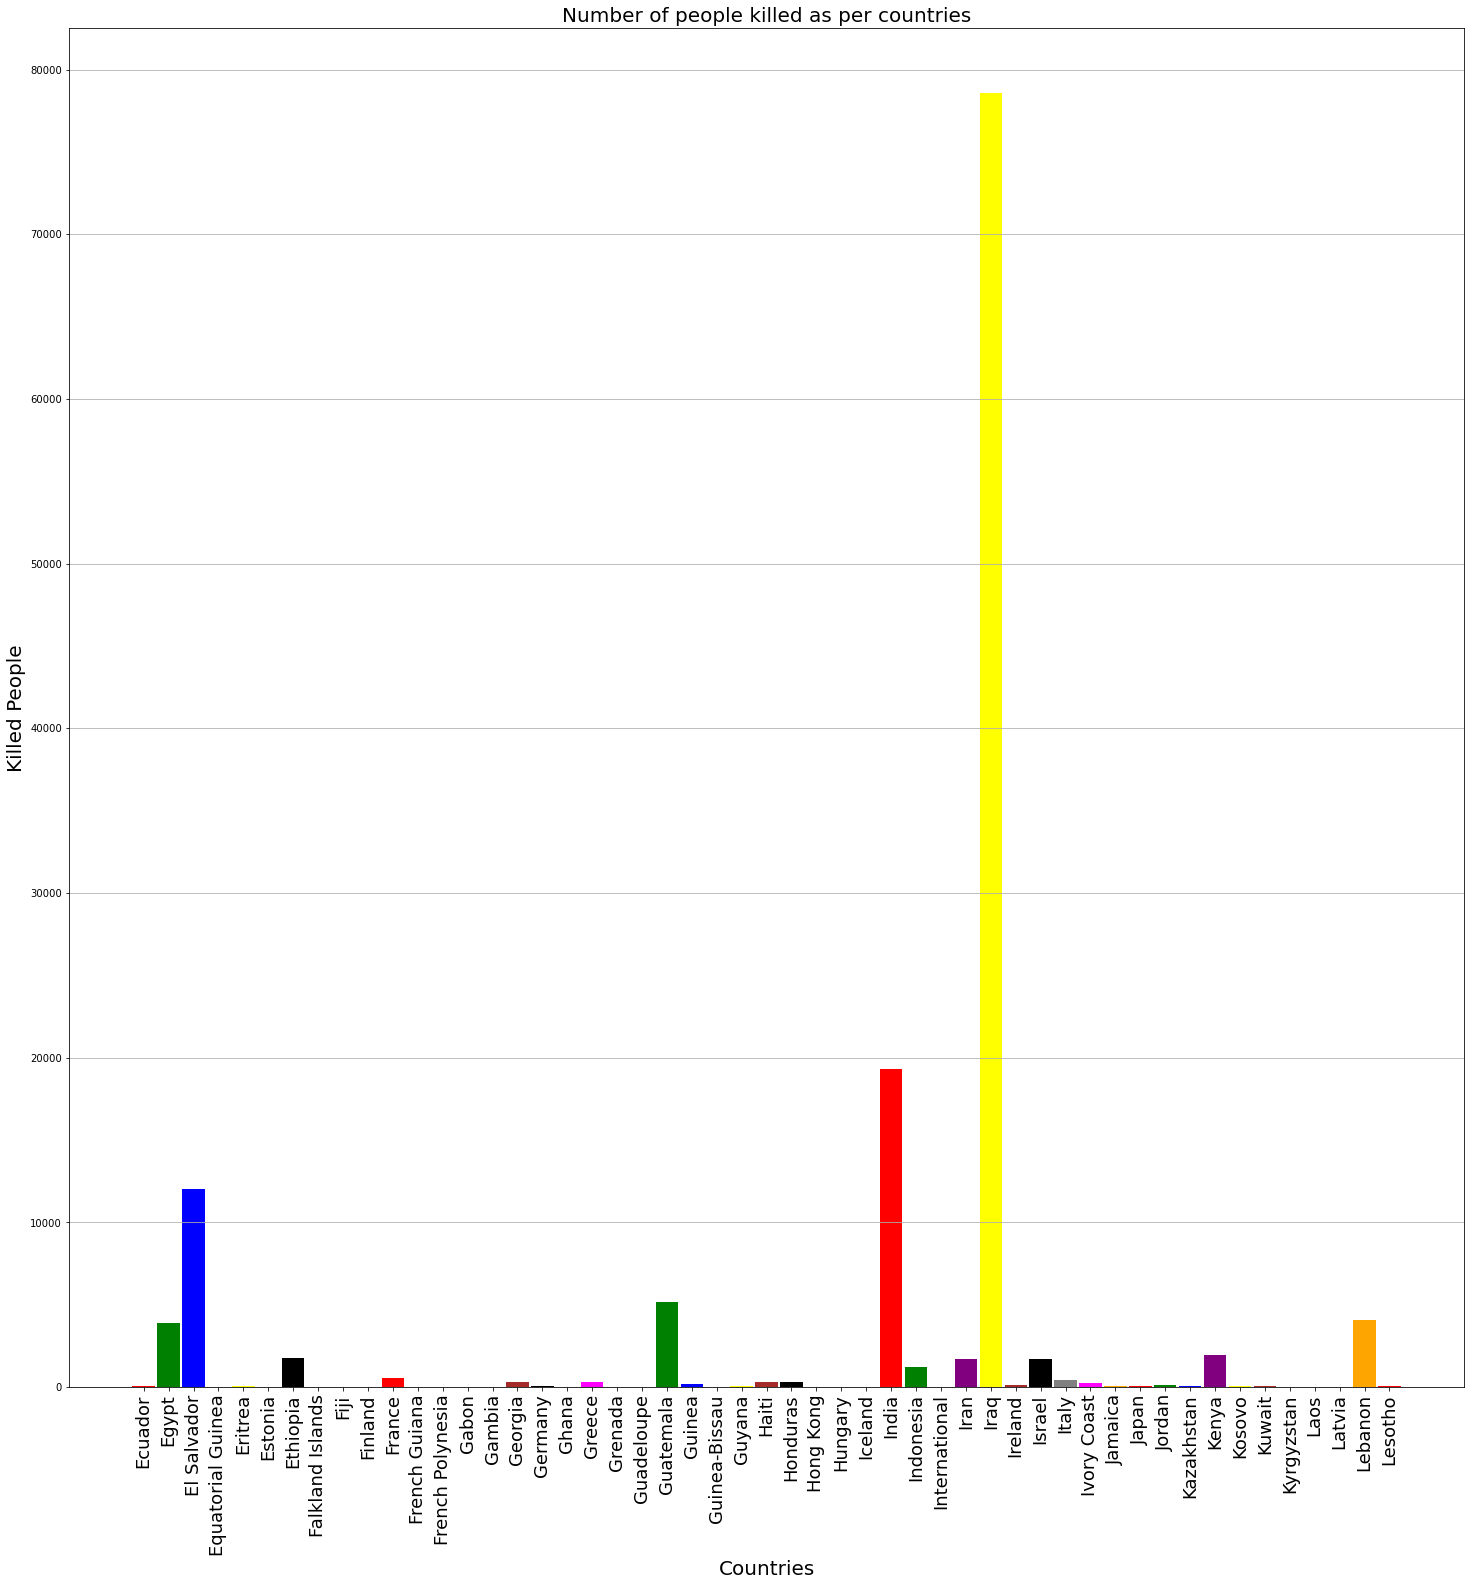

In [36]:
labels = countryKill.columns.tolist()
labels = labels[50:101]
index = np.arange(len(labels))
transpoze = countryKill.T
values = transpoze.values.tolist()
values = values[50:101]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=20
fig_size[1]=20
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of people killed as per countries', fontsize = 20)
plt.show()

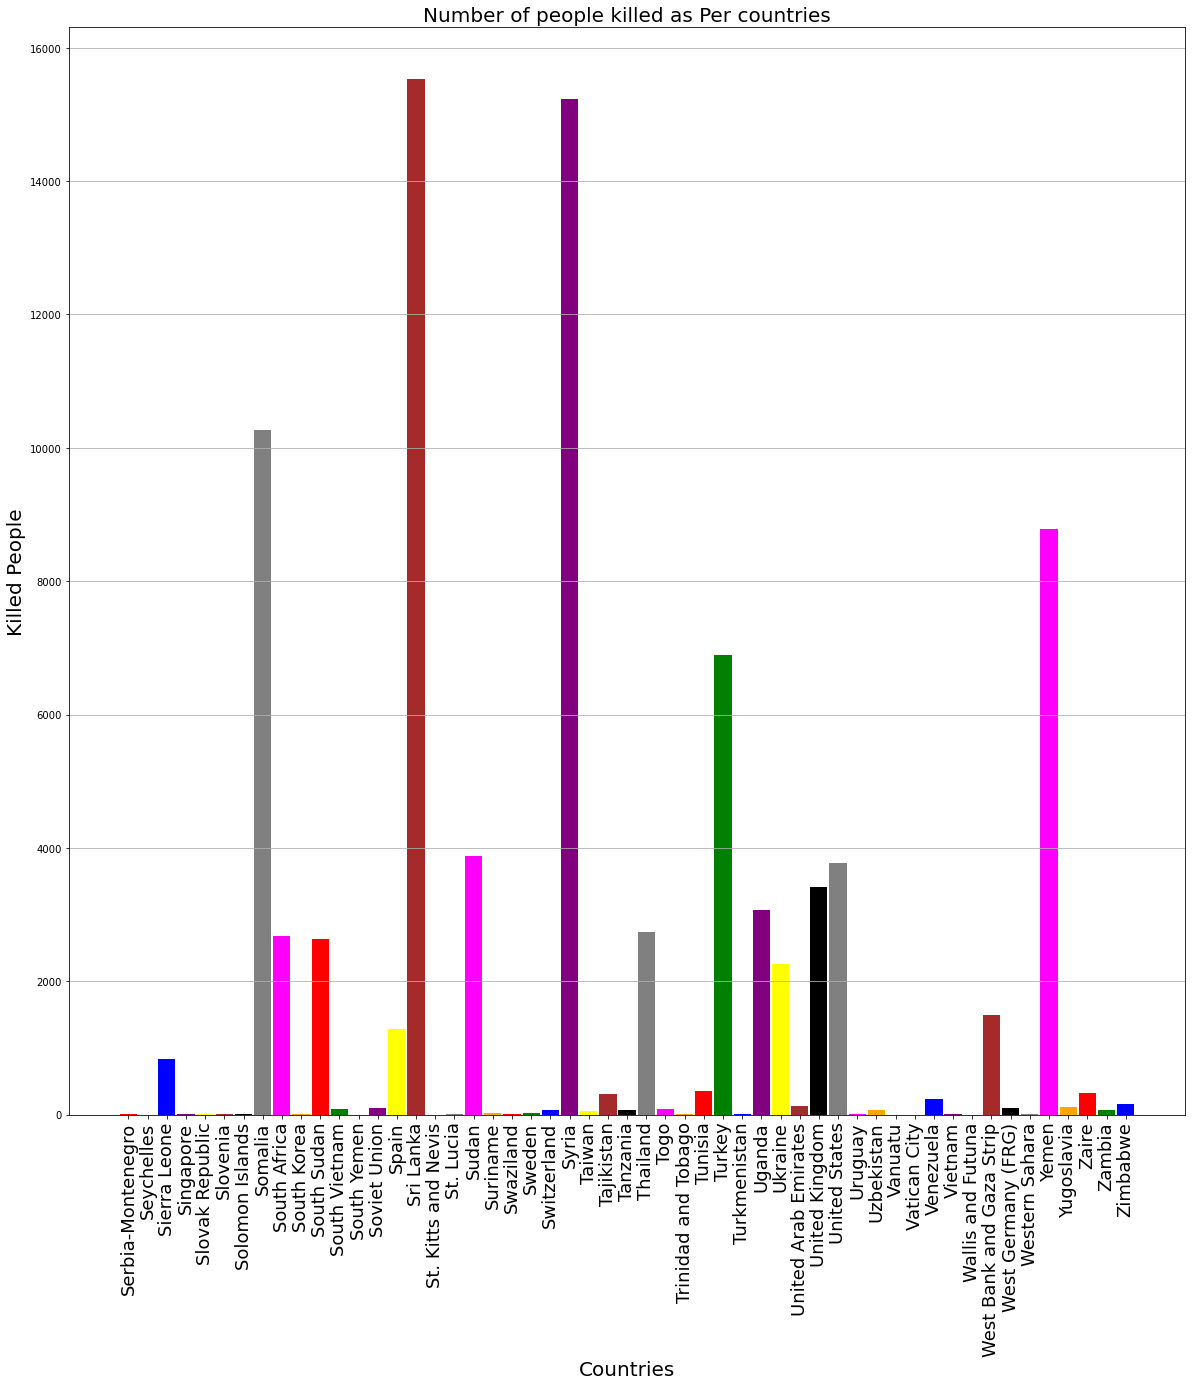

In [37]:
labels = countryKill.columns.tolist()
labels = labels[152:206]
index = np.arange(len(labels))
transpoze = countryKill.T
values = transpoze.values.tolist()
values = values[152:206]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of people killed as Per countries', fontsize = 20)
plt.show()

* Terrorist acts in the Middle East and northern Africa have been seen to have fatal consequences. The Middle East and North Africa are seen to be the places of serious terrorist attacks. In addition, even though there is a perception that Muslims are supporters of terrorism, Muslims are the people who are most damaged by terrorist attacks. If you look at the graphics, it appears that Iraq, Afghanistan and Pakistan are the most damaged countries. All of these countries are Muslim countries.